In [194]:
#Lazar Novakovic Hw # 22

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
test_inputs = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', delimiter=',')
test_inputs = np.asarray(test_inputs)
test_inputs

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [205]:
import warnings
warnings.filterwarnings('ignore')
X = test_inputs[:,1:14] #data 
Y = test_inputs[:,0] #target

In [206]:
Y=Y.astype('int')

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
len(X)

len(X_train)
len(X_test)

45

In [208]:
#Using Kneighbors estimator
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [209]:
#Check the accuracy of the constructed model.
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))
#75.6% being a decent model accuracy. 
#This is done with a relatively small data set of wine.
# A larger data set for testing and training may increase the accuracy.

The accuracy is 75.6%


In [200]:
#Checking the affect of small perturbations of the neighbor distance on accuracy.
avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

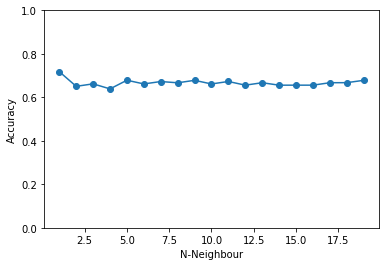

In [201]:
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])

plt.show()
#Unfortunately changes in Kneighbor values used for the estimator do not seem to affect the accuracy significantly for this data set.